In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


sc.logging.print_header()

adata = sc.read_h5ad('nbl(UQlabel).h5ad')###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
adata

AnnData object with n_obs × n_vars = 165813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'n

In [3]:
# Compute UMAP
sc.tl.umap(adata)

# The UMAP coordinates will be stored in adata.obsm['X_umap']

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


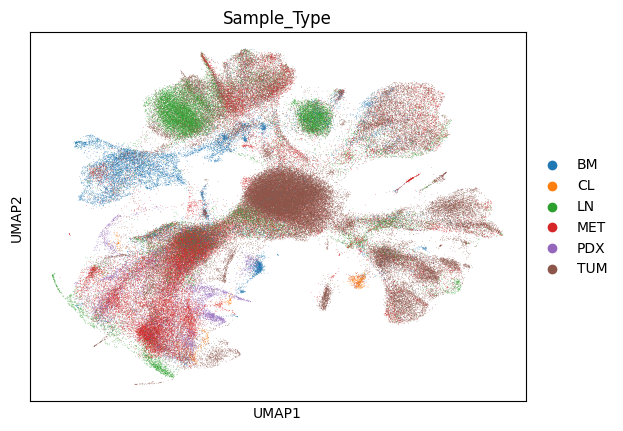

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


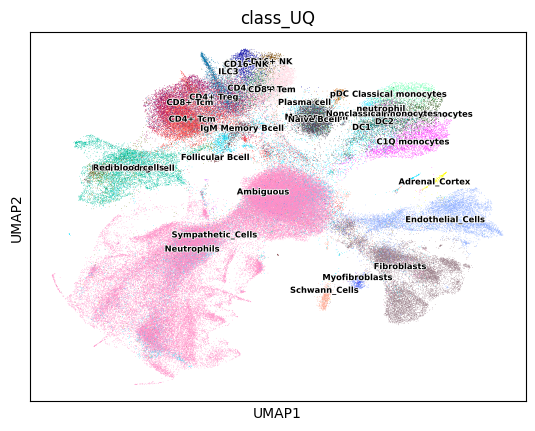

In [4]:
# Now you can plot using the umap() function:
sc.pl.umap(adata, color=['Sample_Type'])
sc.pl.umap(adata, color=['class_UQ'], legend_fontsize="6", legend_fontoutline=1, legend_loc='on data')


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


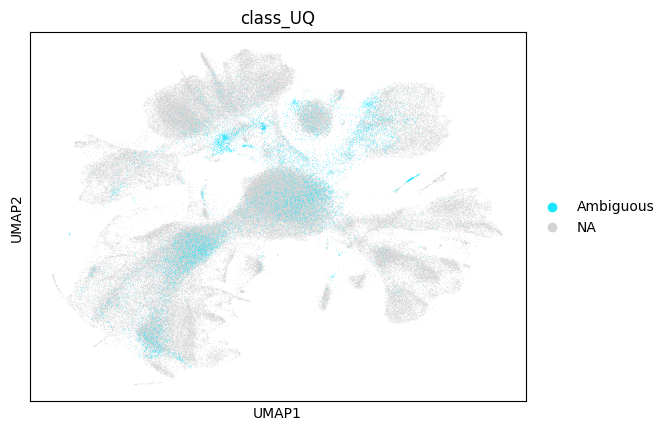

In [5]:
sc.pl.umap(adata, color=['class_UQ'], groups = "Ambiguous")

In [6]:
adata.obs.class_UQ.cat.categories

Index(['Adrenal_Cortex', 'Ambiguous', 'C1Q monocytes', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ Treg', 'CD8+ Tcm', 'CD8+ Tem', 'CD16+ NK', 'CD16- NK',
       'Classical monocytes', 'DC1', 'DC2', 'Endothelial_Cells', 'Fibroblasts',
       'Follicular Bcell', 'ILC3', 'IgM Memory Bcell',
       'Intermediate monocytes', 'Memory Bcell', 'Myofibroblasts',
       'Naive Bcell', 'Neutrophils', 'Nonclassical monocytes', 'Plasma cell',
       'Proliferating Tcell', 'Red blood cells', 'Schwann_Cells',
       'Sympathetic_Cells', 'neutrophil', 'pDC'],
      dtype='object')

# subsetting unknown fibroblast cells for further annotation

In [7]:
##edata for all kinds of fibroblast cells
fdata=adata[(adata.obs['class_UQ'].isin(['Fibroblasts','Myofibroblasts']))].copy()
fdata

AnnData object with n_obs × n_vars = 12314 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nF

In [8]:
np.max(fdata.X)

8.102597

In [9]:
np.min(fdata.X)

0.0

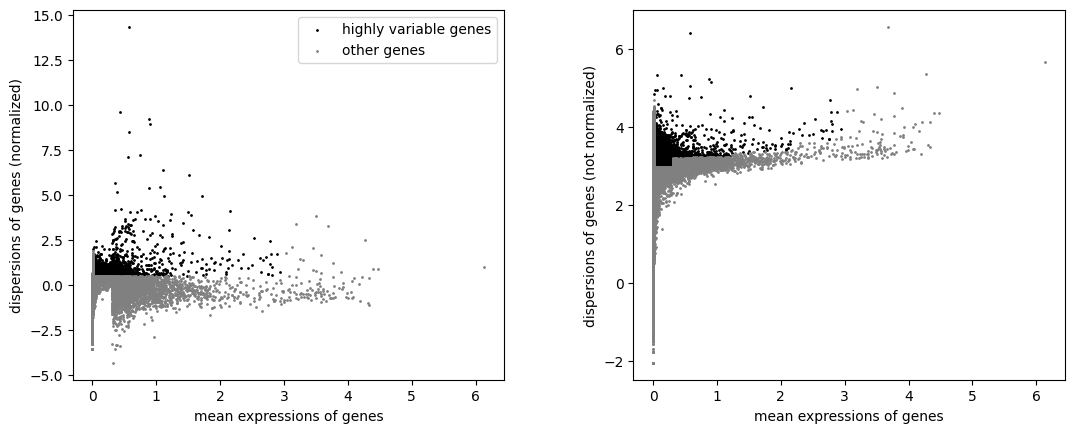

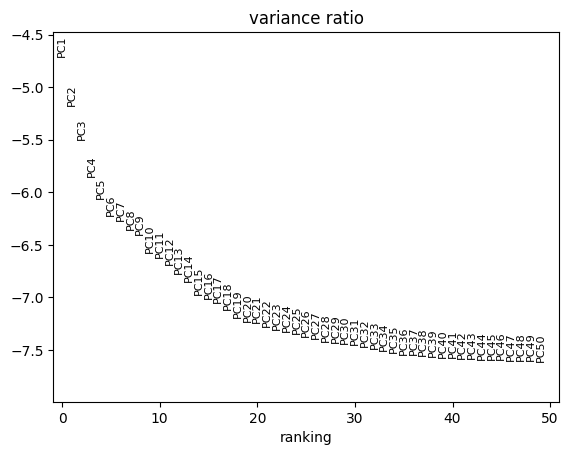

2023-07-25 14:27:14,044 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-25 14:27:19,236 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-25 14:27:19,311 - harmonypy - INFO - Iteration 1 of 10
2023-07-25 14:27:28,871 - harmonypy - INFO - Iteration 2 of 10
2023-07-25 14:27:33,802 - harmonypy - INFO - Iteration 3 of 10
2023-07-25 14:27:38,275 - harmonypy - INFO - Iteration 4 of 10
2023-07-25 14:27:42,742 - harmonypy - INFO - Iteration 5 of 10
2023-07-25 14:27:45,411 - harmonypy - INFO - Iteration 6 of 10
2023-07-25 14:27:48,858 - harmonypy - INFO - Iteration 7 of 10
2023-07-25 14:27:52,899 - harmonypy - INFO - Converged after 7 iterations


In [10]:
try:
    fdata.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata)
fdata.raw = fdata
fdata = fdata[:, fdata.var.highly_variable]
sc.pp.regress_out(fdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata, max_value=10)
sc.tl.pca(fdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata, key="Sample_ID")
sc.pp.neighbors(fdata,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata, min_dist = 0.3)

In [11]:
np.max(fdata.X)

10.0

In [12]:
np.min(fdata.X)

-5.5476055

In [13]:
fdata.write('fibroblasts_subset01.h5ad', compression = 'gzip')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


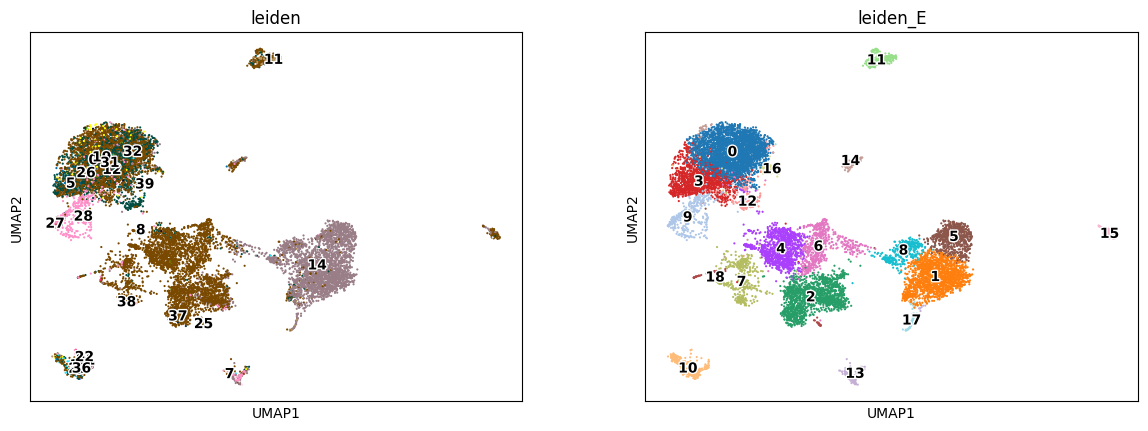

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


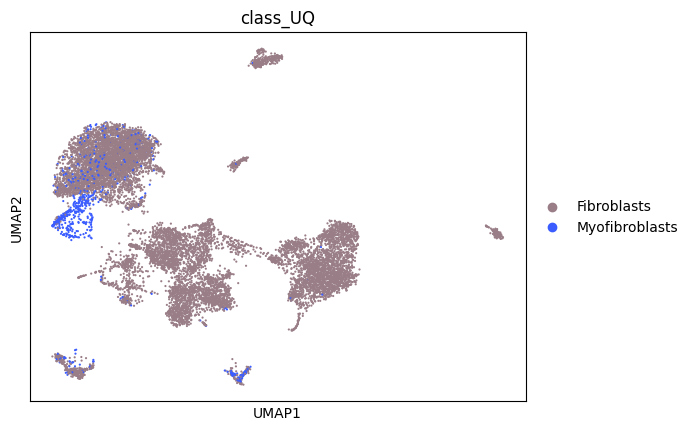

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


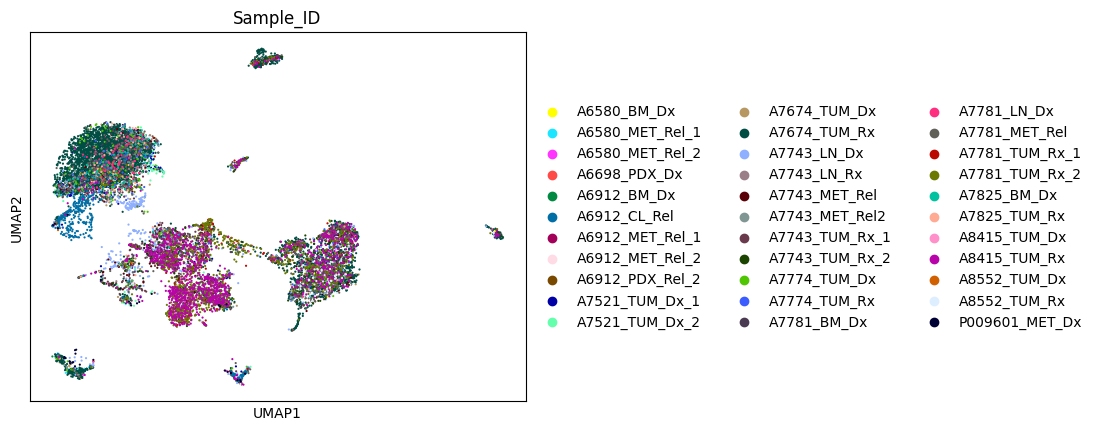

In [14]:
sc.tl.leiden(fdata, key_added = "leiden_E")
sc.pl.umap(fdata, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata, color=['class_UQ'])
sc.pl.umap(fdata, color=['Sample_ID'])

In [15]:
sc.tl.rank_genes_groups(fdata,groupby='leiden_E', method='wilcoxon')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


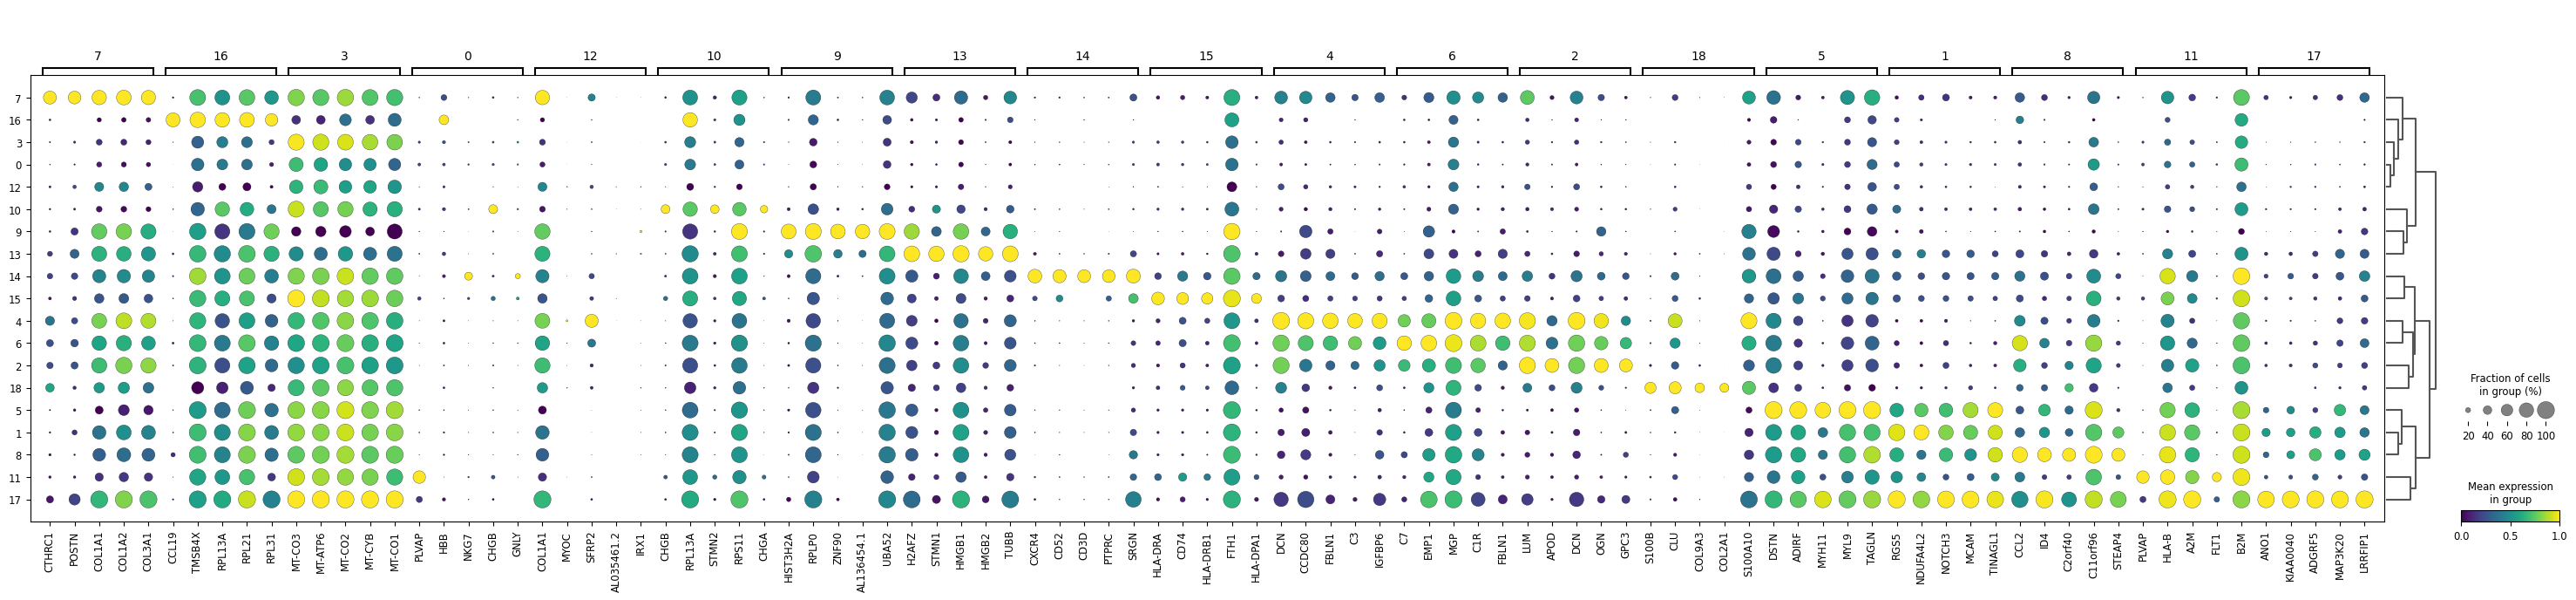

In [21]:
sc.pl.rank_genes_groups_dotplot(fdata,n_genes=5,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

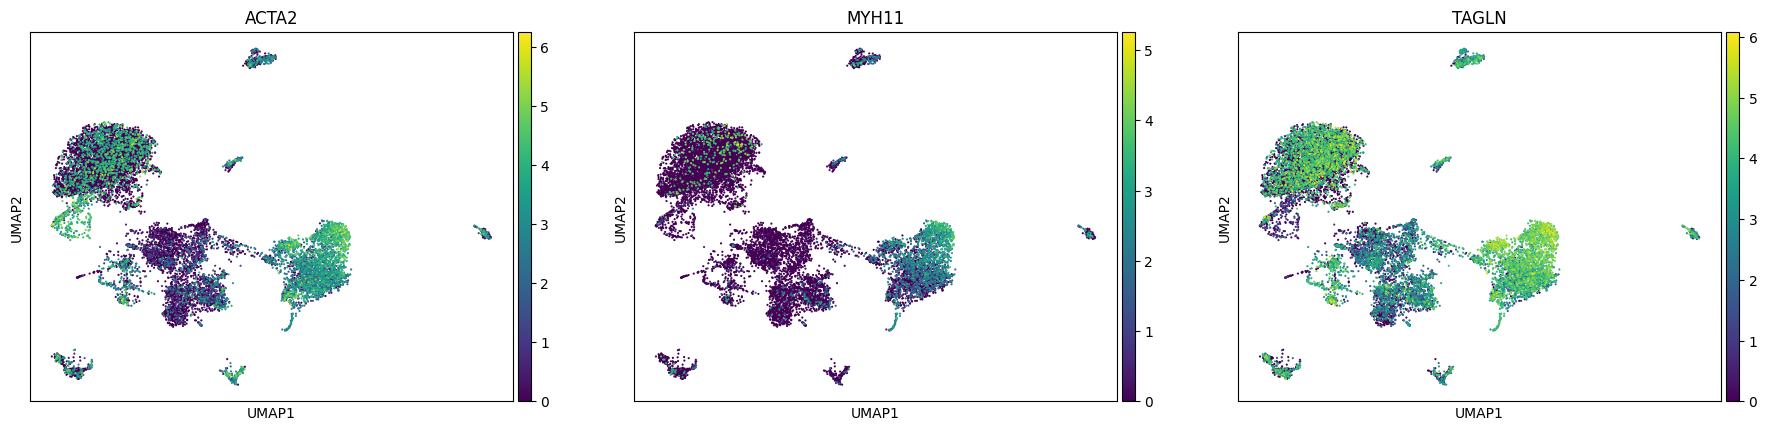

In [17]:
sc.pl.umap(fdata,color=['ACTA2','MYH11','TAGLN'])

In [ ]:
# AMBIGUOUS clusters: 10, 17, 11, 19
# Cluster16 - potentially proliferating cells? ambiguous group - contains non-histone chromosomal high mobility group protein
#2 - Fibroblast - LUM, APOD
#10 - AMBIGUOUS - CHGB- tyrosine-sulfated secretory protein abundant in peptidergic endocrine cells and neurons; CHGA - found in secretory vesicles of neurons and endocrine cells; STMN2 - neuronal growth and osteogenesis
#11 - Vascular Endothelial (FLT1)
#15 - T cells
#13 - Proliferating Endothelial
#18 - AMBIGIOUS - ADGRF5: Predicted to act upstream of or within several processes, including glomerular filtration; pharyngeal arch artery morphogenesis; and surfactant homeostasis. Located in cell surface and cytoplasmic vesicle; potentially epithelial;
#### BRD4: nonspecific; LRRFIP1: prognostic biomarker of glioma; LOXL2: <- same as LRRFIP1; ANO1: GIT associated
#19 - AMBIGIOUS - inflammatory marker: CCL19, TMSB4X - regeneration, tissue repair; + ribosomal markers
##20 - HSPs - all heat shock proteins
##21 - Glial cells -> CDH19: marker for glioblastoma stem-like cells; CRYAB: involved in reactive astrogliosis in traumatic brain injuries; S100B: peripheral blood brain barrier marker, glial-specific, expressed primarily by astrocytes


#14 - Fibroblast
#12 - Fibroblast subtype SFRP2+
# - Endometrial ;TMSB10 - Non-specific - Mixed function (mainly); LGALS1; S100A11: endometrial
#9 - immune? 
#8 - AMBIGUOUS - ribosomal protein, dna binding trans factor
#7 - Myofibroblasts: Cardiac fibroblasts (CTHRC1 and POSTN), COL1A1, 2, 3A1 -> myofibroblasts
#5 - Mural cells; - MYL9, TAGLN
#6 - Reticular Fibroblast: MGP - Reticular Fibroblasts https://www.sciencedirect.com/science/article/pii/S0022202X15355226


#4 - Fibroblast   - DCN, CCDC80
#3 - AMBIGUOUS - MT genes
#2 - Fibroblast - LUM, APOD
#1 - Mural cells: Vascular smooth muscle cells*** / pericytes (RGS5), MCAM - mural cells, NOTCH3 also exp by mural cells
#0 - Ambiguous - ribosomal

In [18]:
pd.DataFrame(fdata.uns['rank_genes_groups']['names']).head(5)

0         1     2        3       4      5      6       7         8   
0    B2M      RGS5   LUM   MT-CO3     DCN   DSTN     C7  CTHRC1      CCL2  \
1   TPT1  NDUFA4L2  APOD  MT-ATP6  CCDC80  ADIRF   EMP1   POSTN       ID4   
2  RPL13    NOTCH3   DCN   MT-CO2   FBLN1  MYH11    MGP  COL1A1   C2orf40   
3   RPS2      MCAM   OGN   MT-CYB      C3   MYL9    C1R  COL1A2  C11orf96   
4  RPS3A   TINAGL1  GPC3   MT-CO1  IGFBP6  TAGLN  FBLN1  COL3A1    STEAP4   

            9      10     11       12     13     14        15      16   
0    HIST3H2A    CHGB  PLVAP      VIM  H2AFZ  CXCR4   HLA-DRA   CCL19  \
1       RPLP0  RPL13A  HLA-B  MT-ATP6  STMN1   CD52      CD74  TMSB4X   
2       ZNF90   STMN2    A2M   MT-CO1  HMGB1   CD3D  HLA-DRB1  RPL13A   
3  AL136454.1   RPS11   FLT1   MT-CYB  HMGB2  PTPRC      FTH1   RPL21   
4       UBA52    CHGA    B2M   COL1A1   TUBB   SRGN  HLA-DPA1   RPL31   

         17       18  
0      ANO1    S100B  
1  KIAA0040      CLU  
2    ADGRF5   COL9A3  
3   MAP3K20   COL2A1  
4   LRRFIP1  S100A10

In [19]:
cellmarker_dict={'T cell':['CD3D','CD44'],
'NK':['NCAM1','NCR1'], 
'Endothelial':['PECAM1','IGFBP2','LY6E'],
'Lymphatic endothelial':['CCL21','PDPN','LYVE1'],
'Proliferating Endothelial':['MKI67','STMN1'],
'Venous endothelial':['LEFTY1','EPHB4'],
'Arterial endothelial':['CXCL12','EPHB2'],
'Fibroblasts':['VIM','LUM','COL1A1'],
'Myofibroblasts':['MYH9','MYH10','MYH11','ACTA2','CALD1','TAGLN'],                 
                 }


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


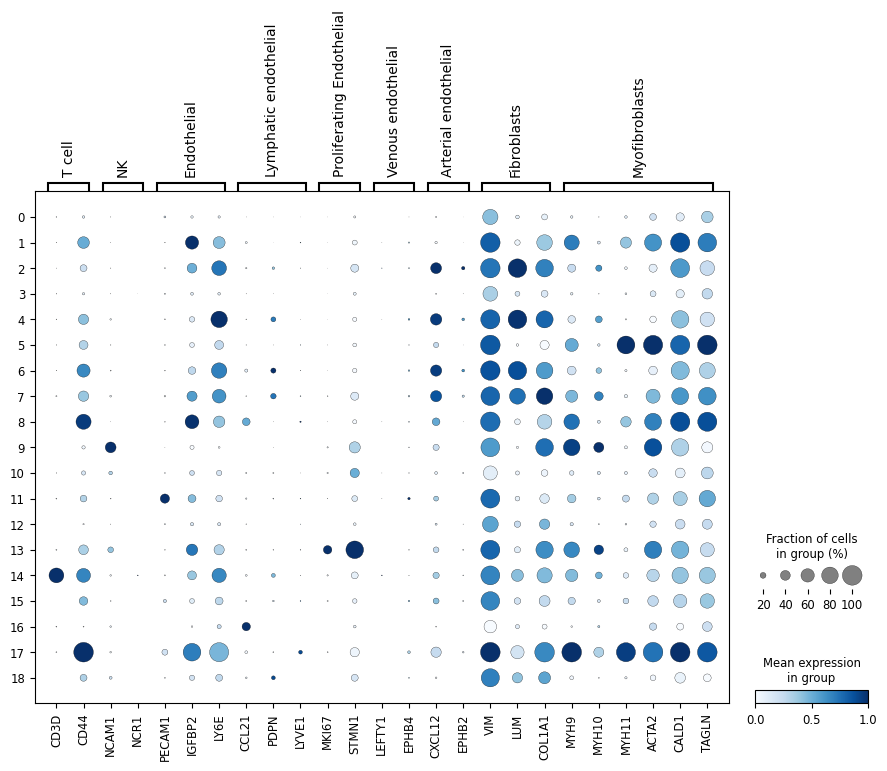

In [20]:
sc.pl.dotplot(fdata, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [22]:
#To map the identified clusters to a cell type annotation label

fibroannot= {
    '0':'Ambiguous',
    '1':'Mural cells',
    '2':'Fibroblasts',
    '3':'Ambiguous',
    '4':'Fibroblasts',
    '5':'Mural cells',
    '6':'Reticular Fibroblasts',
    '7':'Myofibroblasts',
    '8':'Mural cells',
    '9':'Ambiguous',
    '10':'Ambiguous',
    '11':'Ambiguous',
    '12':'Fibroblasts A',
    '13':'Proliferating Endothelial',
    '14':'T cells',
    '15':'Ambiguous',
    '16':'Ambiguous',
    '17':'Ambiguous',
    '18':'Glial cells',
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata.obs['cell type'] = fdata.obs['leiden_E'].map(fibroannot).astype('category')



/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


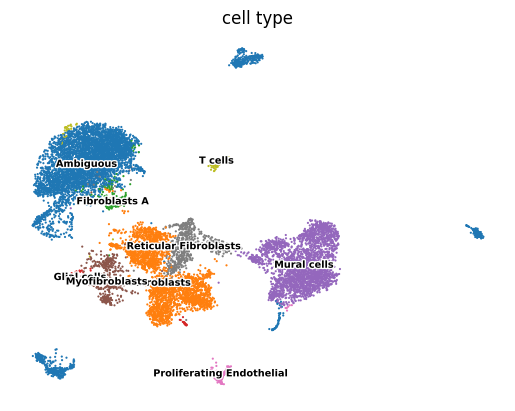

In [23]:
sc.pl.umap(fdata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


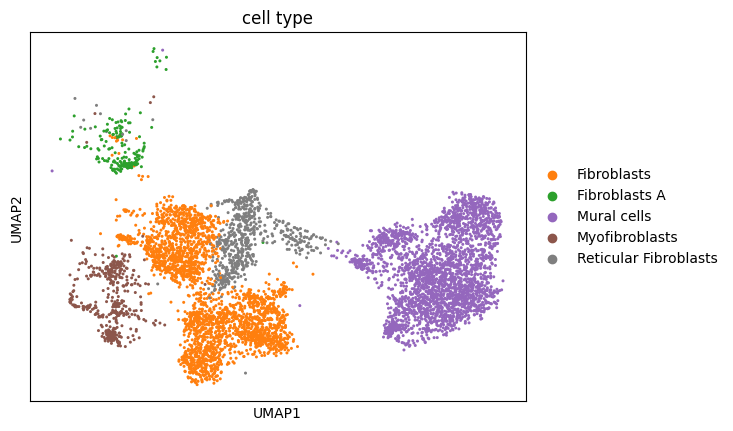

In [35]:
fdata2=fdata[fdata.obs['cell type'].isin(['Fibroblasts','Mural cells','Reticular Fibroblasts','Myofibroblasts','Fibroblasts A'])].copy()
sc.pl.umap(fdata2,color='cell type')

In [25]:
fdata2.write('fibroblasts_subset02.h5ad')

In [7]:
#fdata2 = sc.read_h5ad('fibroblasts_subset02.h5ad') #run this if reimporting

In [36]:
fdata2

AnnData object with n_obs × n_vars = 6382 × 7568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [39]:
fdata2 = fdata2.raw.to_adata()

In [40]:
np.max(fdata2.X)

8.102597

In [41]:
np.min(fdata2.X)

0.0

# Repeat everything from the start to clean up the fibroblast clusters (2nd iteration)

In [42]:
sc.tl.umap(fdata2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


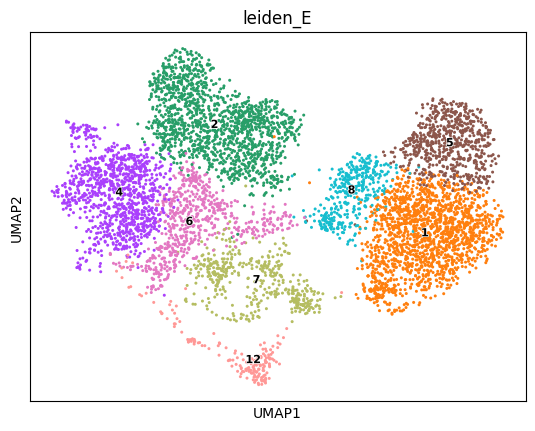

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


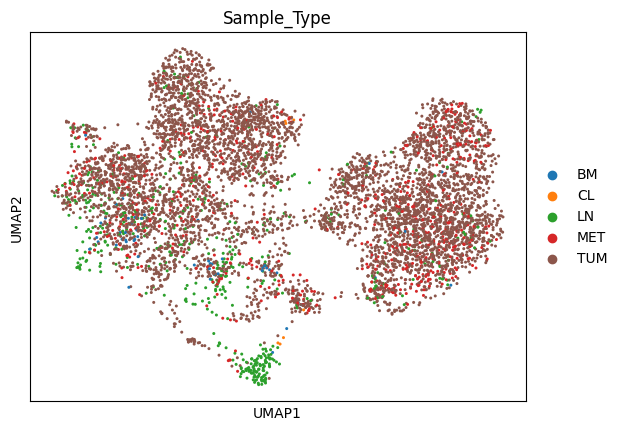

In [43]:
sc.pl.umap(fdata2, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_Type'])

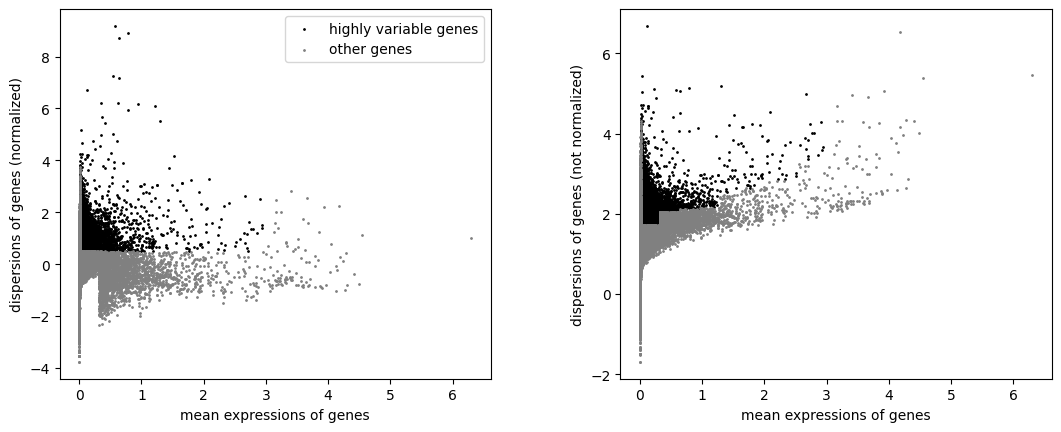

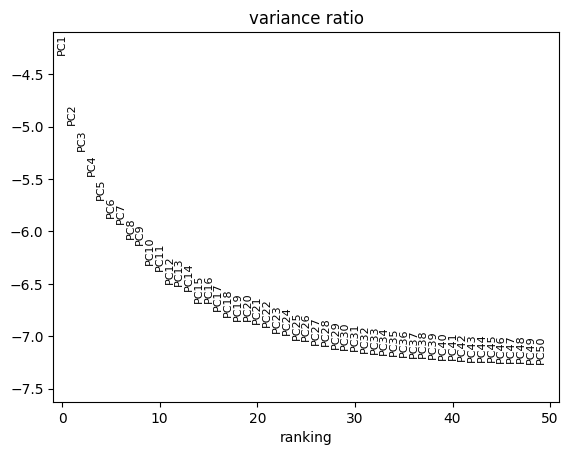

2023-07-25 15:32:01,581 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-25 15:32:05,900 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-25 15:32:05,916 - harmonypy - INFO - Iteration 1 of 10
2023-07-25 15:32:08,140 - harmonypy - INFO - Iteration 2 of 10
2023-07-25 15:32:10,433 - harmonypy - INFO - Iteration 3 of 10
2023-07-25 15:32:12,867 - harmonypy - INFO - Iteration 4 of 10
2023-07-25 15:32:14,646 - harmonypy - INFO - Iteration 5 of 10
2023-07-25 15:32:15,958 - harmonypy - INFO - Iteration 6 of 10
2023-07-25 15:32:17,142 - harmonypy - INFO - Iteration 7 of 10
2023-07-25 15:32:18,400 - harmonypy - INFO - Iteration 8 of 10
2023-07-25 15:32:20,291 - harmonypy - INFO - Iteration 9 of 10
2023-07-25 15:32:21,295 - harmonypy - INFO - Iteration 10 of 10
2023-07-25 15:32:22,411 - harmonypy - INFO - Stopped before convergence


In [44]:
try:
    fdata2.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata2)
fdata2.raw = fdata2
fdata2 = fdata2[:, fdata2.var.highly_variable]
sc.pp.regress_out(fdata2, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata2, max_value=10)
sc.tl.pca(fdata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata2, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata2, key="Sample_ID")
sc.pp.neighbors(fdata2,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata2, min_dist = 0.3)

In [45]:
fdata2.write('fibroblasts_subset02_postscale.h5ad')

In [5]:
#fdata2 = sc.read_h5ad('fibroblasts_subset02_postscale.h5ad')###(prior steps do not need to be run after importing this re-annotated labels)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


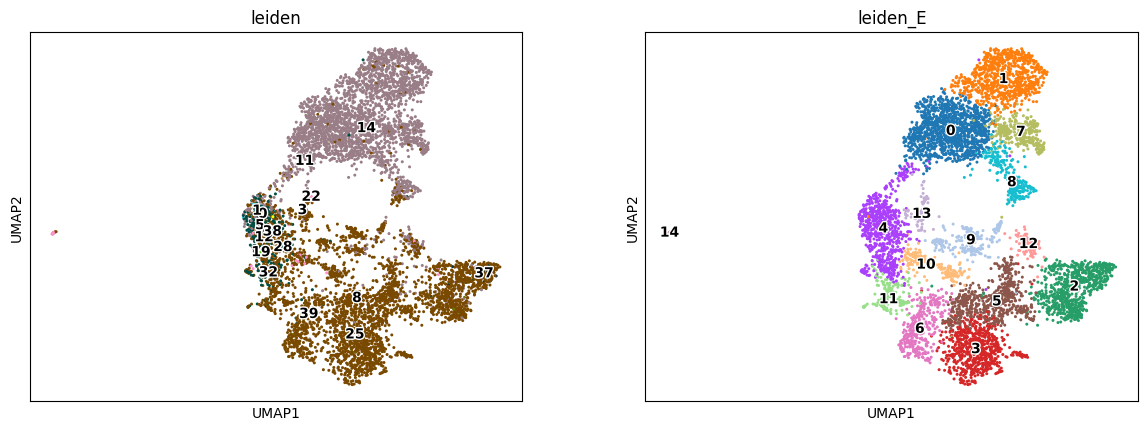

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


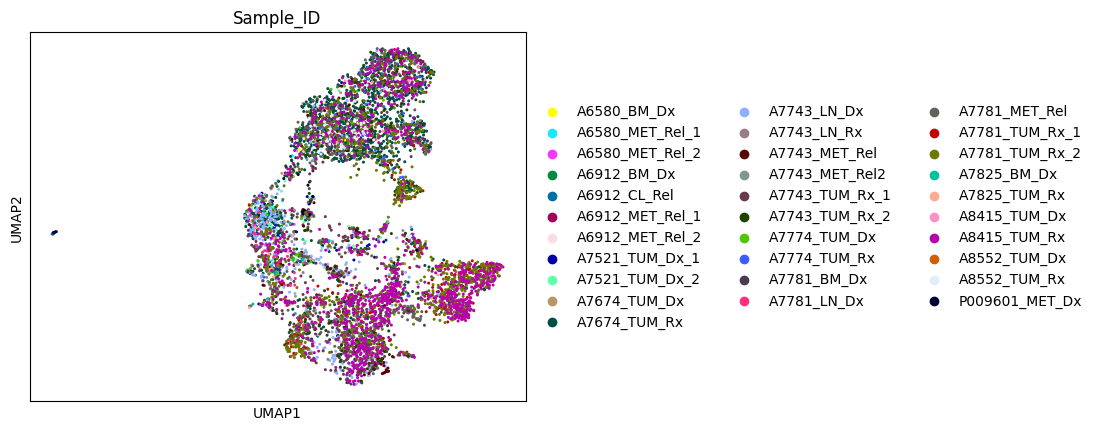

In [46]:
sc.tl.leiden(fdata2, key_added = "leiden_E")
sc.pl.umap(fdata2, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_ID'])

In [47]:
fdata2.write('fibro_subset02.h5ad')

In [48]:
sc.tl.rank_genes_groups(fdata2,groupby='leiden_E', method='wilcoxon')

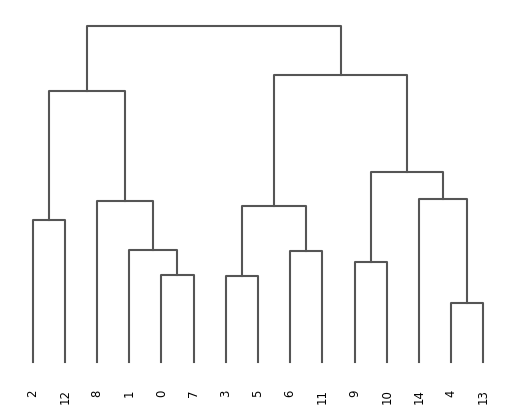

<Axes: >

In [50]:
sc.tl.dendrogram(fdata2,groupby='leiden_E')
sc.pl.dendrogram(fdata2,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


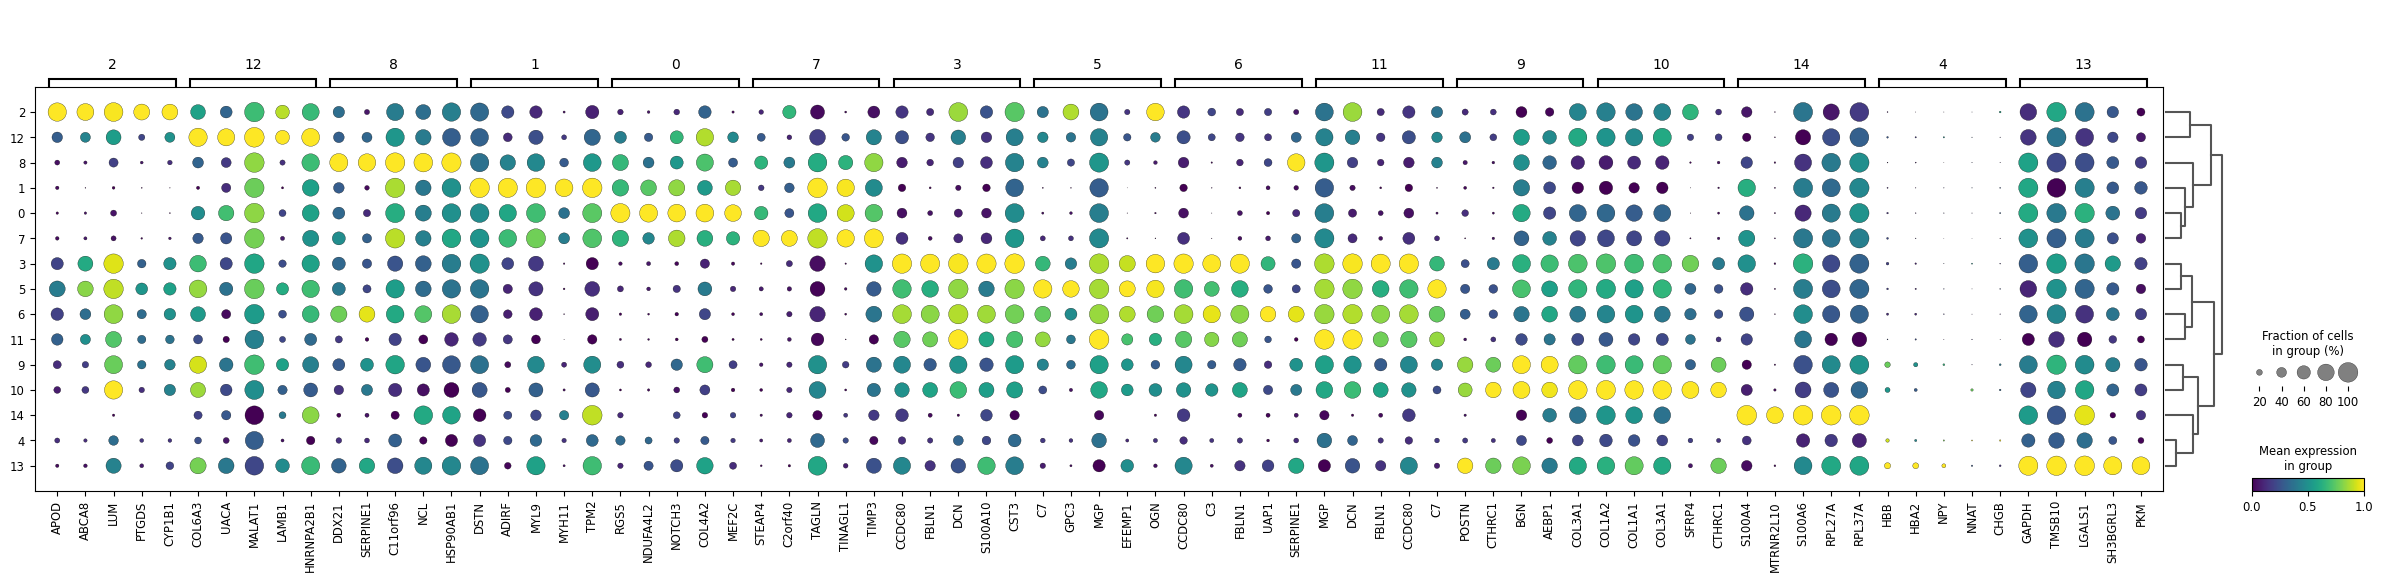

In [51]:
sc.pl.rank_genes_groups_dotplot(fdata2,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


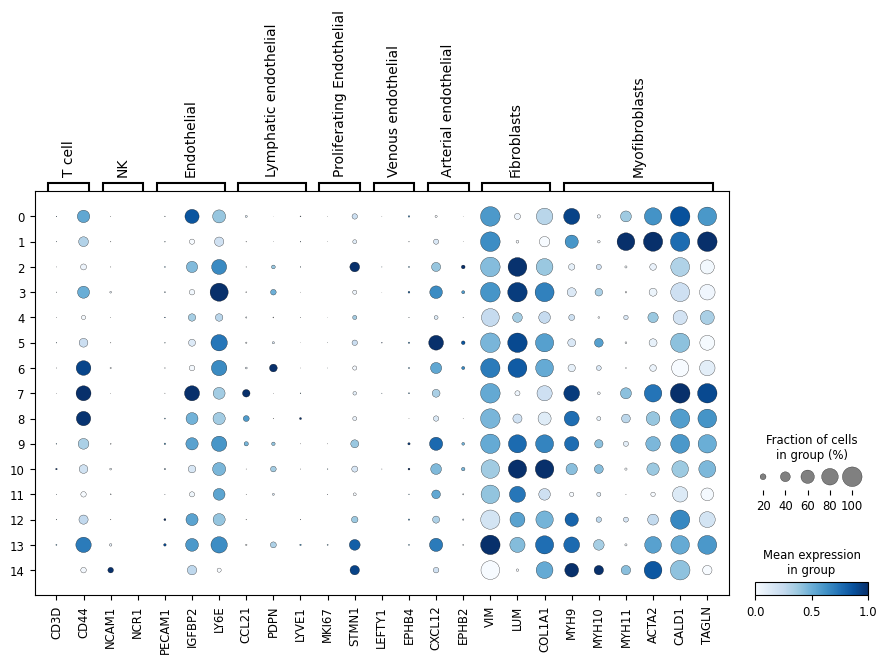

In [54]:
sc.pl.dotplot(fdata2, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [53]:
pd.DataFrame(fdata2.uns['rank_genes_groups']['names']).head(5)

0      1       2        3      4       5         6        7   
0      RGS5   DSTN    APOD   CCDC80  RPS18      C7    CCDC80   STEAP4  \
1  NDUFA4L2  ADIRF   ABCA8    FBLN1  RPL13    GPC3        C3  C2orf40   
2    NOTCH3   MYL9     LUM      DCN  RPS3A     MGP     FBLN1    TAGLN   
3    COL4A2  MYH11   PTGDS  S100A10  RPL10  EFEMP1      UAP1  TINAGL1   
4     MEF2C   TPM2  CYP1B1     CST3  RPL19     OGN  SERPINE1    TIMP3   

          8       9      10      11         12        13         14  
0     DDX21   POSTN  COL1A2     MGP     COL6A3     GAPDH     S100A4  
1  SERPINE1  CTHRC1  COL1A1     DCN       UACA    TMSB10  MTRNR2L10  
2  C11orf96     BGN  COL3A1   FBLN1     MALAT1    LGALS1     S100A6  
3       NCL   AEBP1   SFRP4  CCDC80      LAMB1  SH3BGRL3     RPL27A  
4  HSP90AB1  COL3A1  CTHRC1      C7  HNRNPA2B1       PKM     RPL37A

In [59]:
# Cluster 9 has only 1 highly-ranked fibroblast gene, rest are housekeeping genes
#12 - UACA, MALAT1 - cancer associated markers
fibroannot2= {
    '0':'Mural cells',
    '1':'Mural cells',
    '2':'Fibroblasts',
    '3':'Fibroblasts',
    '4':'Ambiguous',
    '5':'Reticular Fibroblasts',
    '6':'Fibroblasts',
    '7':'Mural cells',
    '8':'Fibroblasts #1',
    '9':'Myofibroblasts',
    '10':'Fibroblasts',
    '11':'Reticular Fibroblasts',
    '12':'CAFs',
    '13':'Ambiguous',
    '14':'Ambiguous',

}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata2.obs['cell type'] = fdata2.obs['leiden_E'].map(fibroannot2).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


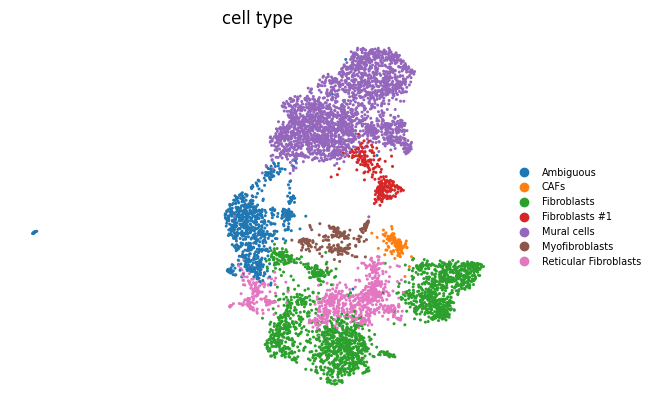

In [60]:
sc.pl.umap(fdata2, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


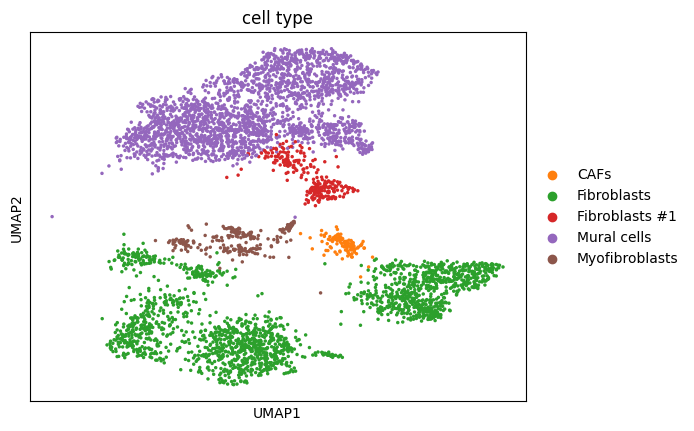

In [61]:
fdata3=fdata2[fdata2.obs['cell type'].isin(['Fibroblasts','Mural cells','CAFs','Fibroblasts #1','Reticular fibroblasts','Myofibroblasts' ])].copy()
sc.pl.umap(fdata3,color='cell type')

In [63]:
fdata3.write('fibro_subset03.h5ad', compression = 'gzip')

In [64]:
fdata3=fdata3.raw.to_adata()


In [65]:
fdata3

AnnData object with n_obs × n_vars = 4813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

# Repeat everything from the start to clean up the fibroblast clusters (3nd iteration)

In [66]:
sc.tl.umap(fdata3)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


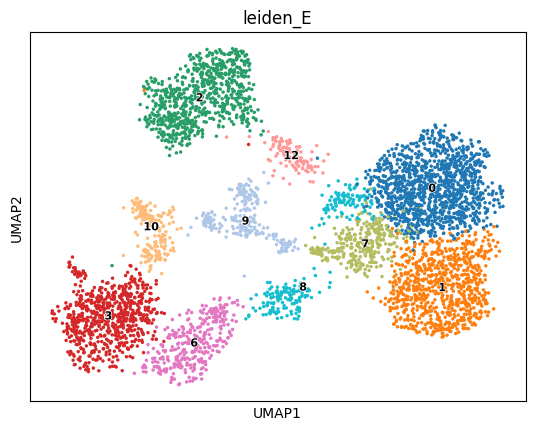

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


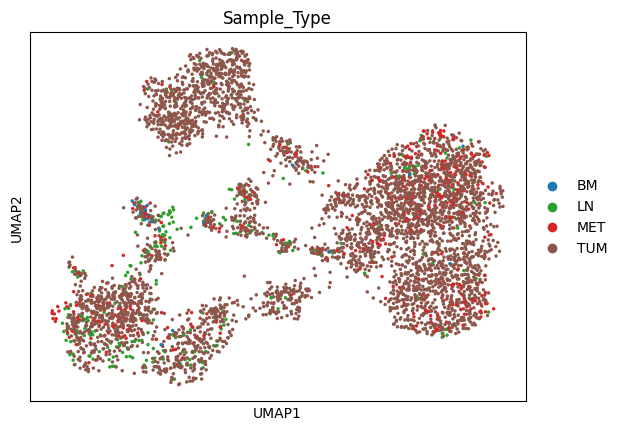

In [67]:
sc.pl.umap(fdata3, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_Type'])

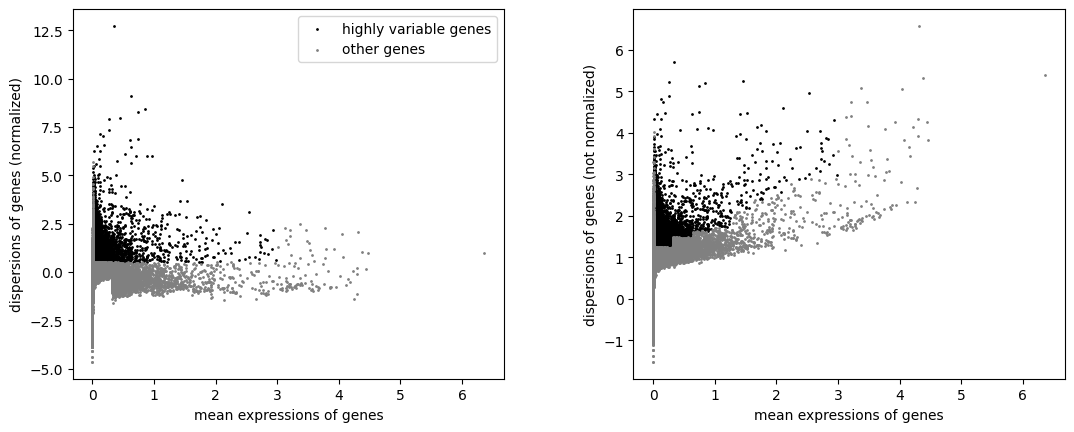

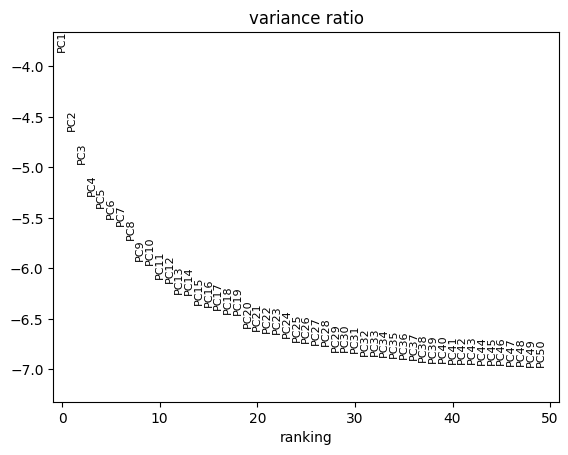

2023-07-27 14:16:45,509 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-27 14:16:49,857 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-27 14:16:49,875 - harmonypy - INFO - Iteration 1 of 10
2023-07-27 14:16:54,325 - harmonypy - INFO - Iteration 2 of 10
2023-07-27 14:16:57,448 - harmonypy - INFO - Iteration 3 of 10
2023-07-27 14:17:00,759 - harmonypy - INFO - Iteration 4 of 10
2023-07-27 14:17:04,058 - harmonypy - INFO - Iteration 5 of 10
2023-07-27 14:17:06,716 - harmonypy - INFO - Iteration 6 of 10
2023-07-27 14:17:09,894 - harmonypy - INFO - Iteration 7 of 10
2023-07-27 14:17:12,714 - harmonypy - INFO - Iteration 8 of 10
2023-07-27 14:17:14,640 - harmonypy - INFO - Iteration 9 of 10
2023-07-27 14:17:17,081 - harmonypy - INFO - Iteration 10 of 10
2023-07-27 14:17:19,260 - harmonypy - INFO - Stopped before convergence


In [68]:
try:
    fdata3.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata3)
fdata3.raw = fdata3
fdata3 = fdata3[:, fdata3.var.highly_variable]
sc.pp.regress_out(fdata3, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata3, max_value=10)
sc.tl.pca(fdata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata3, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata3, key="Sample_ID")
sc.pp.neighbors(fdata3,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata3, min_dist = 0.3)

In [69]:
fdata3.write('fibroblasts_subset03_postscale.h5ad')

In [70]:
#using numpy

np.max(fdata3.X)

10.0

In [71]:
np.min(fdata3.X)

-3.5444024

In [5]:
#fdata3 = sc.read_h5ad('fibro_subset03.h5ad')###after re-annotation

In [72]:
fdata3

AnnData object with n_obs × n_vars = 4813 × 3612
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


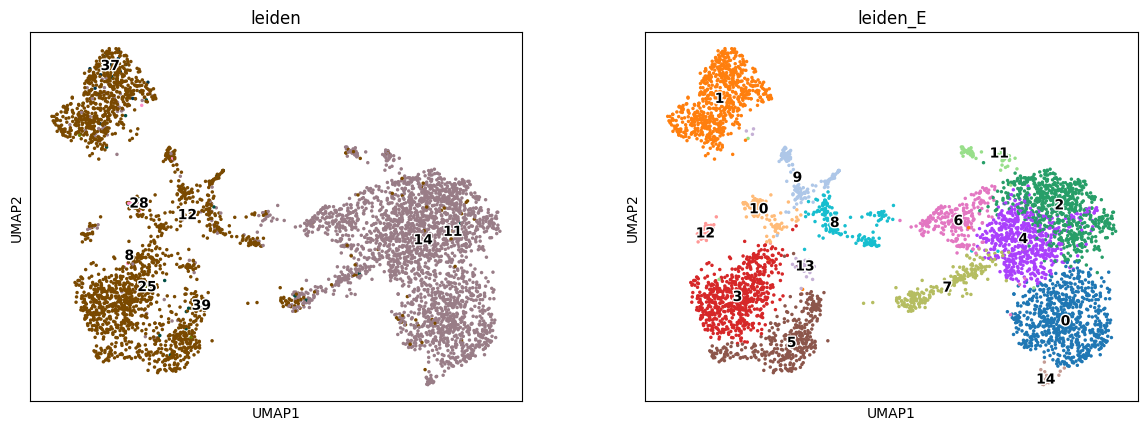

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


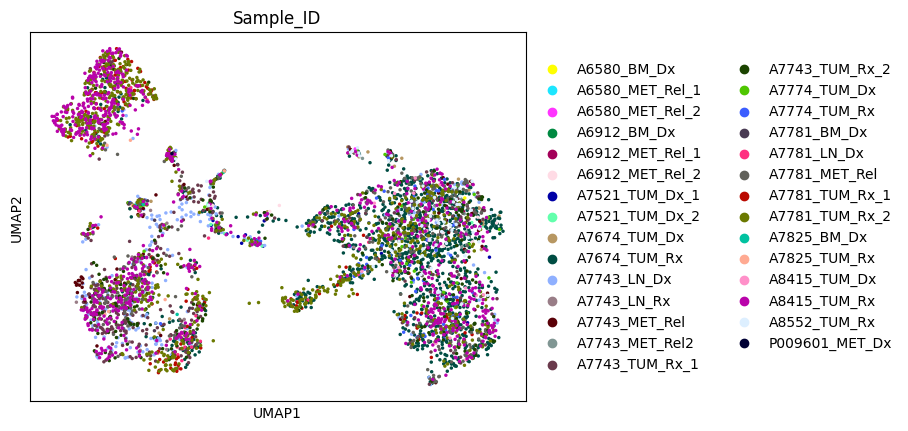

In [73]:
sc.tl.leiden(fdata3, key_added = "leiden_E")
sc.pl.umap(fdata3, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_ID'])

In [76]:
fdata3.write('fibro_subset03.h5ad')

In [77]:
sc.tl.rank_genes_groups(fdata3,groupby='leiden_E', method='wilcoxon')

In [78]:
sc.tl.dendrogram(fdata3,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


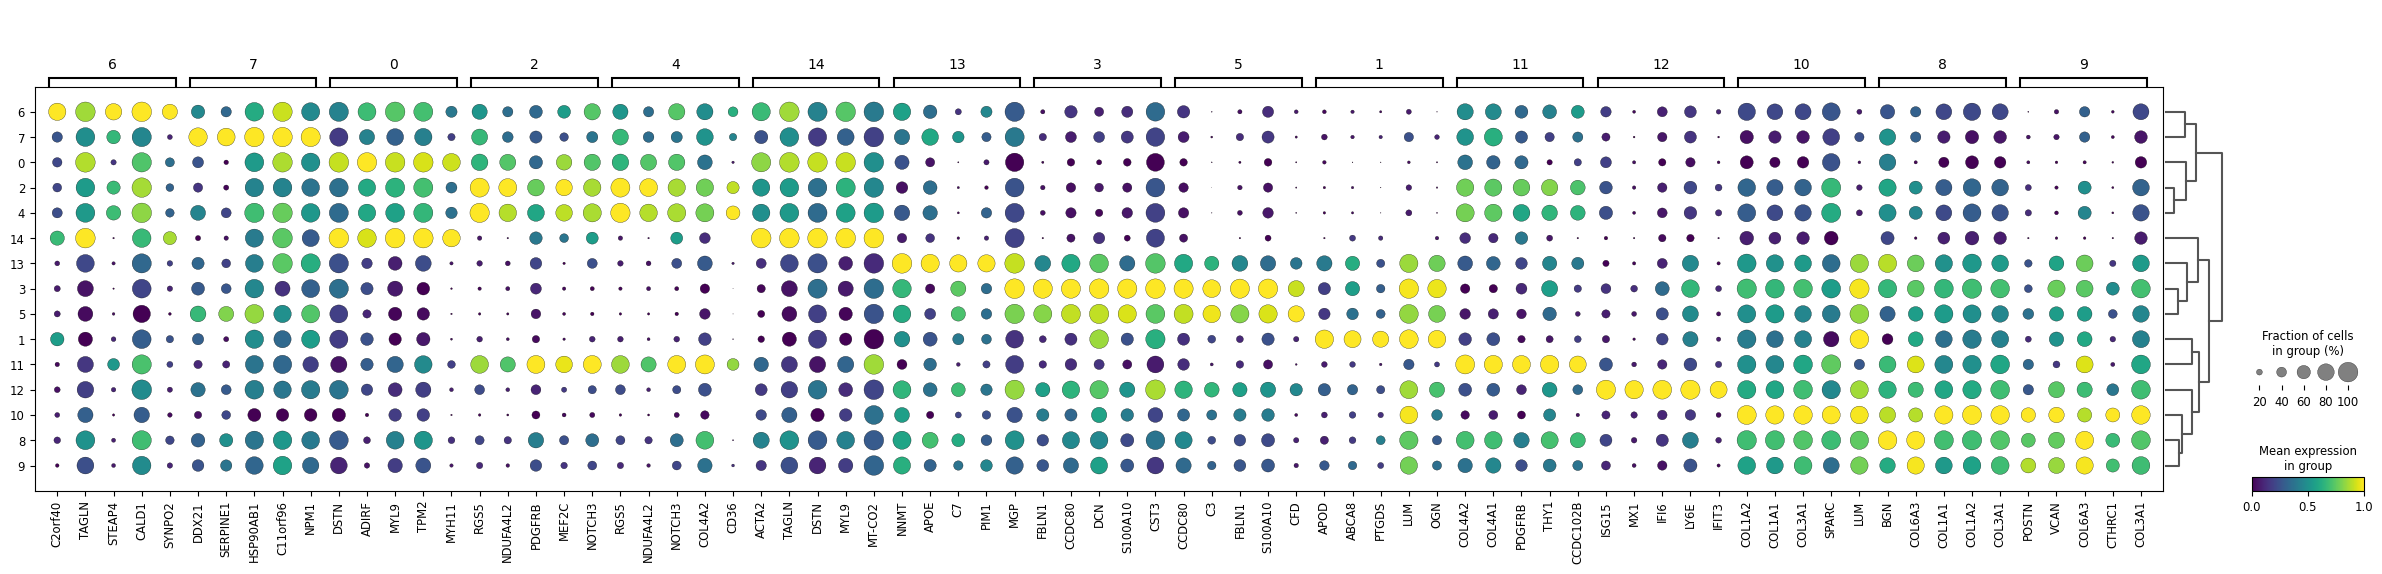

In [79]:
sc.pl.rank_genes_groups_dotplot(fdata3,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


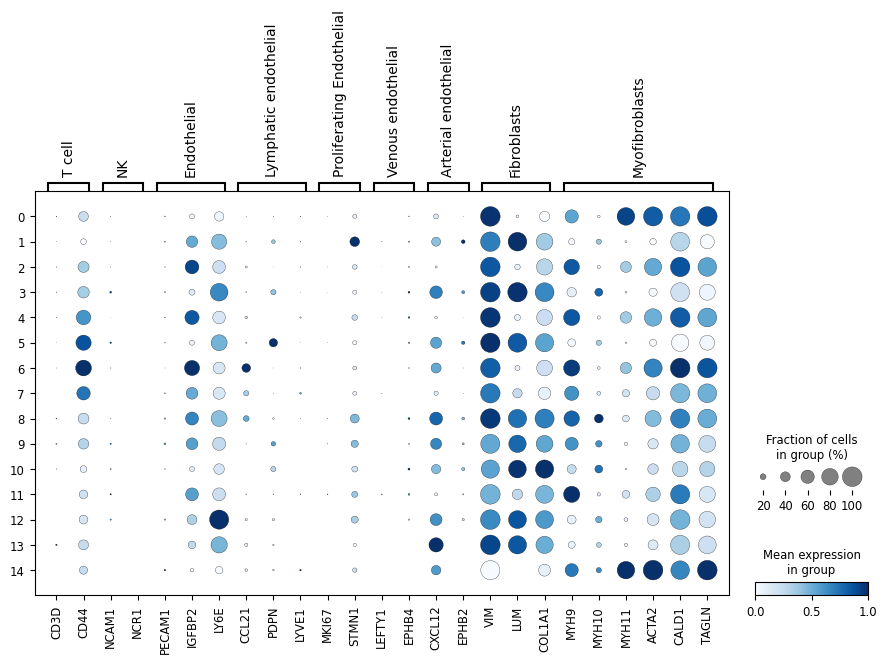

In [80]:
sc.pl.dotplot(fdata3, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [86]:
pd.DataFrame(fdata3.uns['rank_genes_groups']['names']).head(5)

0      1         2        3         4        5        6         7   
0   DSTN   APOD      RGS5    FBLN1      RGS5   CCDC80  C2orf40     DDX21  \
1  ADIRF  ABCA8  NDUFA4L2   CCDC80  NDUFA4L2       C3    TAGLN  SERPINE1   
2   MYL9  PTGDS    PDGFRB      DCN    NOTCH3    FBLN1   STEAP4  HSP90AB1   
3   TPM2    LUM     MEF2C  S100A10    COL4A2  S100A10    CALD1  C11orf96   
4  MYH11    OGN    NOTCH3     CST3      CD36      CFD   SYNPO2      NPM1   

        8       9      10        11     12    13      14  
0     BGN   POSTN  COL1A2    COL4A2  ISG15  NNMT   ACTA2  
1  COL6A3    VCAN  COL1A1    COL4A1    MX1  APOE   TAGLN  
2  COL1A1  COL6A3  COL3A1    PDGFRB   IFI6    C7    DSTN  
3  COL1A2  CTHRC1   SPARC      THY1   LY6E  PIM1    MYL9  
4  COL3A1  COL3A1     LUM  CCDC102B  IFIT3   MGP  MT-CO2

In [84]:
#14 - mural cells over myofibroblasts since only mural cell markers highly expressed and not fibroblasts
#1 - Can't find a particular subset of 1 - just it being fibroblasts - no cancer enriched markers either
#13 - Very small subset - could be reticular fibroblasts if further literature confirms MGP is a marker
fibroannot3= {
    '0':'Mural cells',
    '1':'Fibroblasts',
    '2':'Mural cells',
    '3':'Fibroblasts',
    '4':'Mural cells',
    '5':'Fibroblasts',
    '6':'Mural cells',
    '7':'Fibroblasts #1',
    '8':'Fibroblasts',
    '9':'Myofibroblasts',
    '10':'Fibroblasts',
    '11':'Mural cells',
    '12':'Ambiguous',
    '13':'Fibroblasts',
    '14':'Mural cells',

}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata3.obs['cell type'] = fdata3.obs['leiden_E'].map(fibroannot3).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


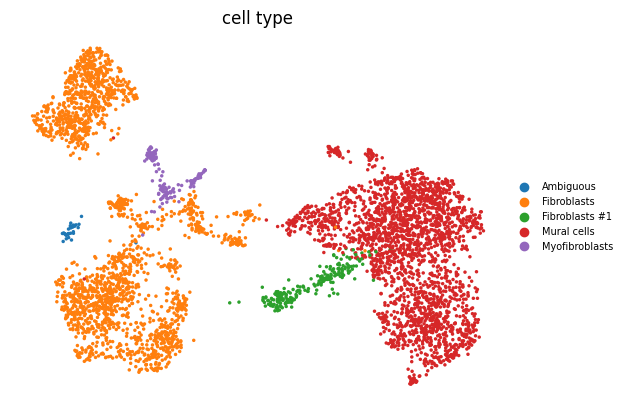

In [85]:
sc.pl.umap(fdata3, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


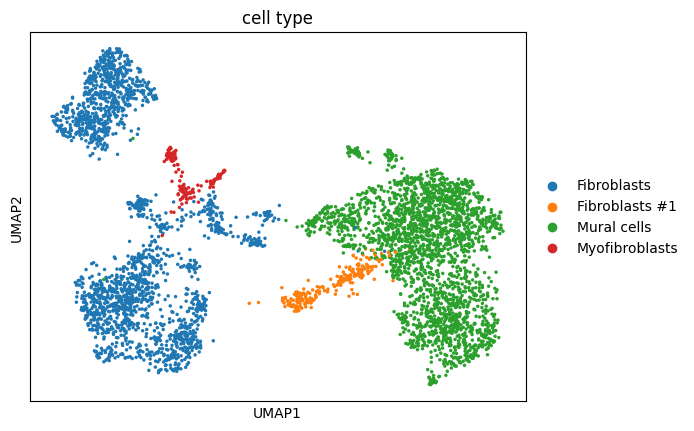

In [87]:
fdata4=fdata3[fdata3.obs['cell type'].isin(['Fibroblasts','Mural cells','Fibroblasts #1','Myofibroblasts' ])].copy()
sc.pl.umap(fdata4,color='cell type')

In [88]:
fdata4.write('fibro_subset04.h5ad', compression = 'gzip')

In [89]:
import tools

In [90]:
tools.combine_two_categories(fdata4,A='Sample_Type', B='cell type')

In [91]:
fdata4.obs

orig.ident  nCount_RNA   
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1        2249  \
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1      A6912_BM_Dx        4934   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1      A6912_MET_Rel_1        6896   
GGAATAATCATTGCGA-1_1_1_1_1_1_1_1_1_1_1_1      A6912_MET_Rel_1        8997   
AACTGGTGTGTTAAGA-1_1_1_1_1_1_1_1_1_1_1         A7521_TUM_Dx_1       11055   
...                                                       ...         ...   
TTCTCTCCAATCAAGA-1_2                             A8552_TUM_Rx        3916   
TTCTTCCTCACTACTT-1_2                             A8552_TUM_Rx        5492   
TTGTTGTCATTCTCTA-1_2                             A8552_TUM_Rx        6612   
TTTAGTCGTATCACCA-1_2                             A8552_TUM_Rx        8220   
GACCGTGAGACCGTTT-1                             P009601_MET_Dx        4774   

                                              nFeature_RNA  scrublet_score   
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1          1017        0.078611  \
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1          2186        0.062837   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1              2219        0.181818   
GGAATAATCATTGCGA-1_1_1_1_1_1_1_1_1_1_1_1              2444        0.211679   
AACTGGTGTGTTAAGA-1_1_1_1_1_1_1_1_1_1_1                2559        0.161398   
...                                                    ...             ...   
TTCTCTCCAATCAAGA-1_2                                  1813        0.048571   
TTCTTCCTCACTACTT-1_2                                  2140        0.103896   
TTGTTGTCATTCTCTA-1_2                                  2641        0.054054   
TTTAGTCGTATCACCA-1_2                                  2900        0.054054   
GACCGTGAGACCGTTT-1                                    1660        0.026052   

                                              scrublet_classification  CMO301   
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN  \
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1                        False     NaN   
GGAATAATCATTGCGA-1_1_1_1_1_1_1_1_1_1_1_1                        False     NaN   
AACTGGTGTGTTAAGA-1_1_1_1_1_1_1_1_1_1_1                          False     NaN   
...                                                               ...     ...   
TTCTCTCCAATCAAGA-1_2                                            False   101.0   
TTCTTCCTCACTACTT-1_2                                            False    97.0   
TTGTTGTCATTCTCTA-1_2                                            False     2.0   
TTTAGTCGTATCACCA-1_2                                            False    34.0   
GACCGTGAGACCGTTT-1                                              False     1.0   

                                              CMO302  CMO303  CMO304   CMO305   
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN      NaN  \
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1     NaN     NaN     NaN      NaN   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1         NaN     NaN     NaN      NaN   
GGAATAATCATTGCGA-1_1_1_1_1_1_1_1_1_1_1_1         NaN     NaN     NaN      NaN   
AACTGGTGTGTTAAGA-1_1_1_1_1_1_1_1_1_1_1           NaN     NaN     NaN      NaN   
...                                              ...     ...     ...      ...   
TTCTCTCCAATCAAGA-1_2                             0.0    75.0    32.0  10427.0   
TTCTTCCTCACTACTT-1_2                             0.0    43.0    70.0  10506.0   
TTGTTGTCATTCTCTA-1_2                             0.0     2.0     2.0    294.0   
TTTAGTCGTATCACCA-1_2                             0.0    41.0    35.0   7233.0   
GACCGTGAGACCGTTT-1                              11.0  9557.0    68.0      8.0   

                                              ...  TCell_Signature   
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.637857  \
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.508085   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_

In [92]:
fdata4.obs.to_csv('fibroblastscelltypes_label.csv')